## IMPORT LIBRARY

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## MEMBACA DATA GAMBAR

In [2]:
img=cv2.imread("uts.jpeg")

In [3]:
img.shape

(3000, 4000, 3)

## MEMBUAT BARIS DAN KOLOM

In [4]:
(baris,kolom)=img.shape[:2] 

In [5]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## OPERASI PIXEL GABUNGAN

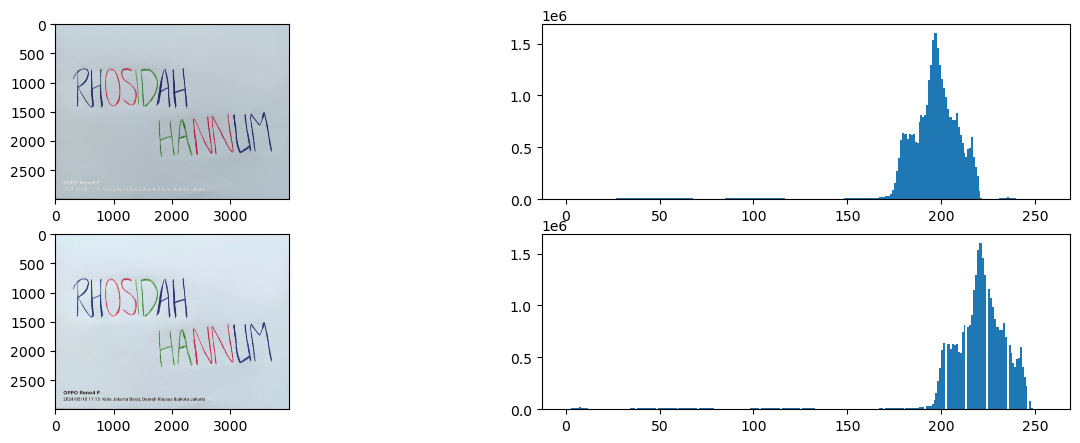

In [7]:
alpa=1.10
beta=5

citra_gabungan =np.zeros((baris,kolom,3))

for x in range(baris):
    for y in range(kolom):
        gcx=(img[x,y]*alpa)+beta
        citra_gabungan[x,y]=gcx

citra_gabungan = citra_gabungan.astype(np.uint8)
fig, axs=plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_gabungan)
axs[1,1].hist(citra_gabungan.ravel(),256,[0,256])
plt.show()

## MENDETEKSI WARNA PADA CITRA

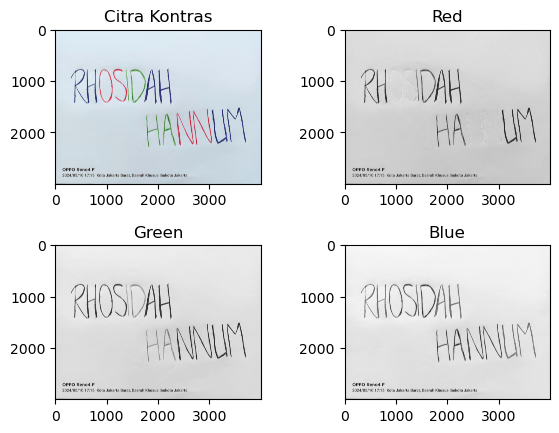

In [8]:
plt.subplot(2, 2, 1)
plt.imshow(citra_gabungan)
plt.title('Citra Kontras')

plt.subplot(2, 2, 2)
plt.imshow(citra_gabungan[:, :, 0], cmap="gray")
plt.title('Red')

plt.subplot(2, 2, 3)
plt.imshow(citra_gabungan[:, :, 1], cmap="gray")
plt.title('Green')

plt.subplot(2, 2, 4)
plt.imshow(citra_gabungan[:, :, 2], cmap="gray")
plt.title('Blue')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Menambahkan jarak antar subplot

plt.show()


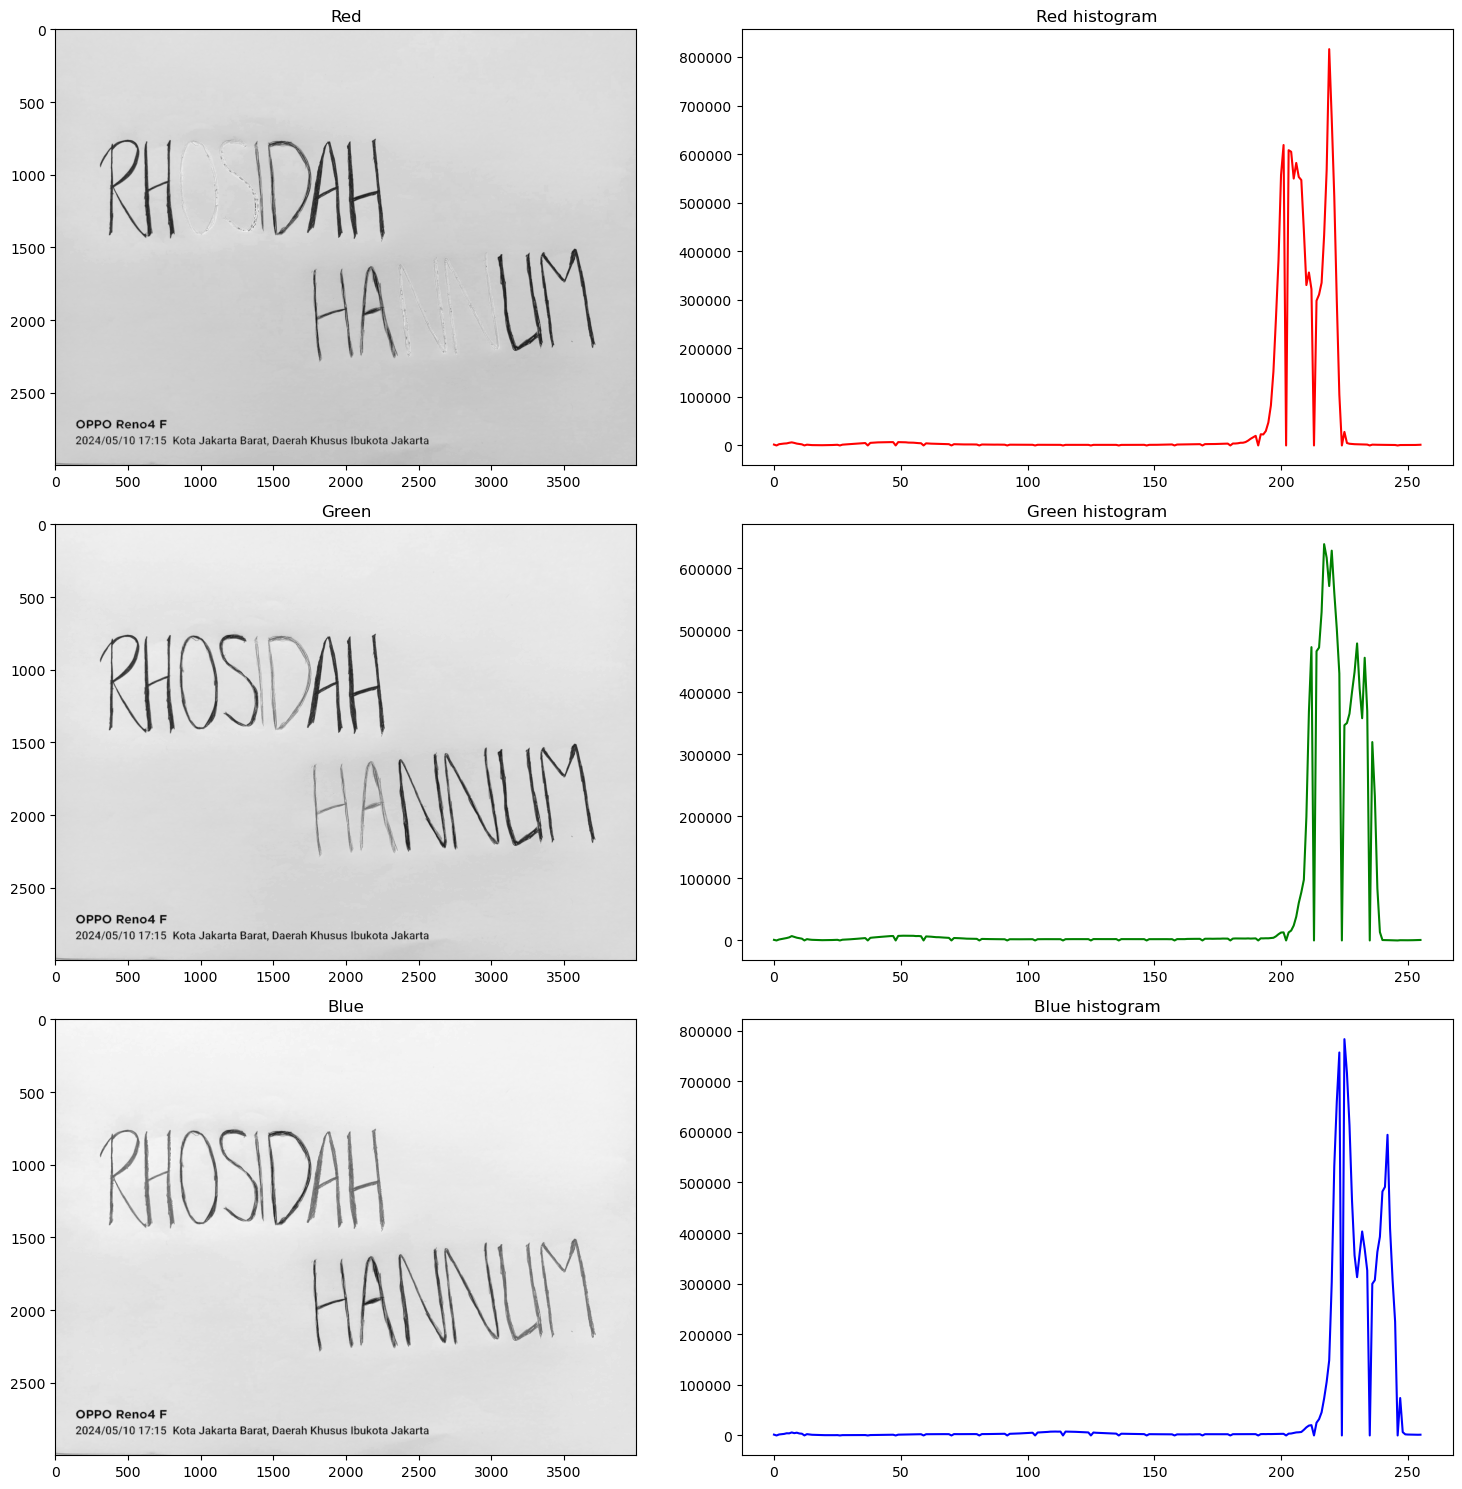

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Merah
merah = citra_gabungan[:, :, 0]
hist_merah = cv2.calcHist([merah], [0], None, [256], [0, 256])
axs[0, 0].imshow(merah, cmap='gray')
axs[0, 0].set_title('Red')
axs[0, 1].plot(hist_merah, color='r')
axs[0, 1].set_title('Red histogram')

# Hijau
hijau = citra_gabungan[:, :, 1]
hist_hijau = cv2.calcHist([hijau], [0], None, [256], [0, 256])
axs[1, 0].imshow(hijau, cmap='gray')
axs[1, 0].set_title('Green')
axs[1, 1].plot(hist_hijau, color='g')
axs[1, 1].set_title('Green histogram')

# Biru
biru = citra_gabungan[:, :, 2]
hist_biru = cv2.calcHist([biru], [0], None, [256], [0, 256])
axs[2, 0].imshow(biru, cmap='gray')
axs[2, 0].set_title('Blue')
axs[2, 1].plot(hist_biru, color='b')
axs[2, 1].set_title('Blue histogram')

plt.tight_layout() 
plt.show()


## NILAI AMBANG BATAS CITRA

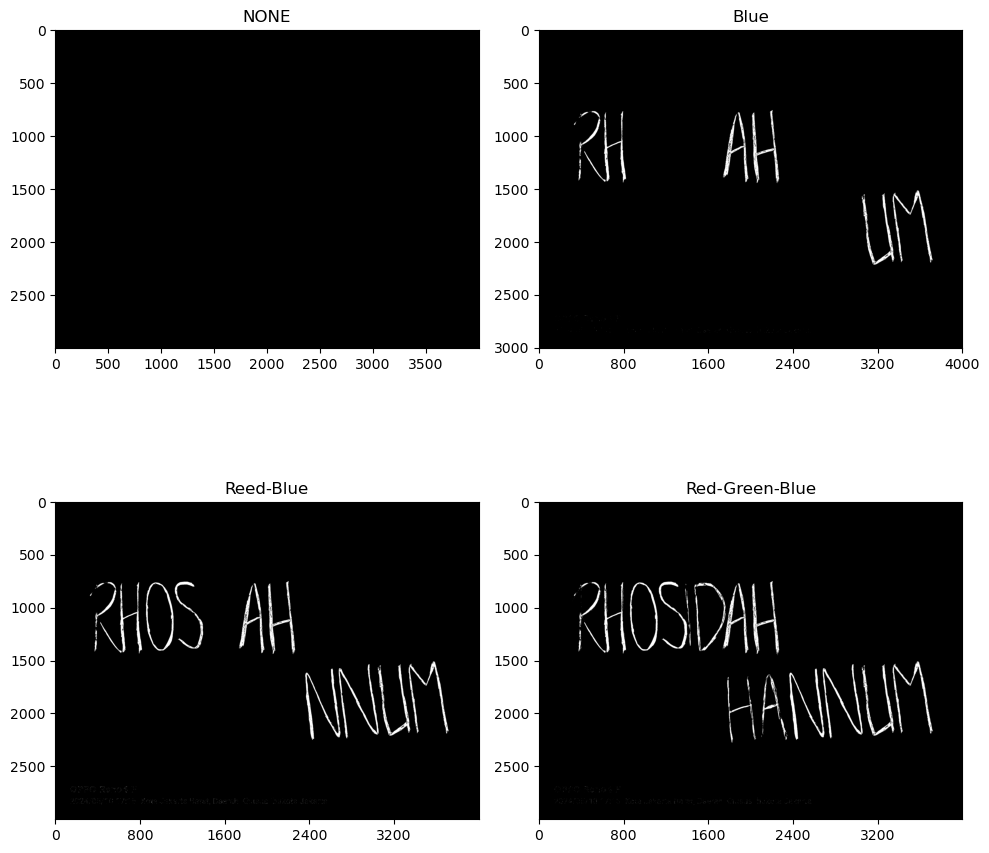

In [16]:
hsv_image = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2HSV)

lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
lower_green = np.array([20, 100, 100])
upper_green = np.array([250, 255, 255])
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

gray = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('Reed-Blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(mask_green, cmap='gray')
plt.title('Red-Green-Blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

plt.tight_layout()
plt.show()